In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from flask import Flask, jsonify

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [7]:
#reflect an existing database into a new model
Base = automap_base()
#reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
#we can review all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
#Save the references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
#create our session link from python to the database
session = Session(engine)

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [20]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [20]:
precip_analysis['date'] = pd.to_datetime(precip_analysis['date'])
precip_analysis

In [38]:
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent = recent[0]
recent

'2017-08-23'

In [39]:
#Create a query that will retrieve the last 12 months of precipitation data
sel = [Measurement.date, Measurement.prcp]

ly_data = session.query(*sel).\
    filter (Measurement.date >= dt.date(2016,8,23)).all()
ly_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [40]:
prec_analysis = pd.DataFrame(ly_data)

In [41]:
prec_analysis['date'] = pd.to_datetime(prec_analysis['date'])
precip_analysis = prec_analysis.set_index('date')
precip_analysis.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


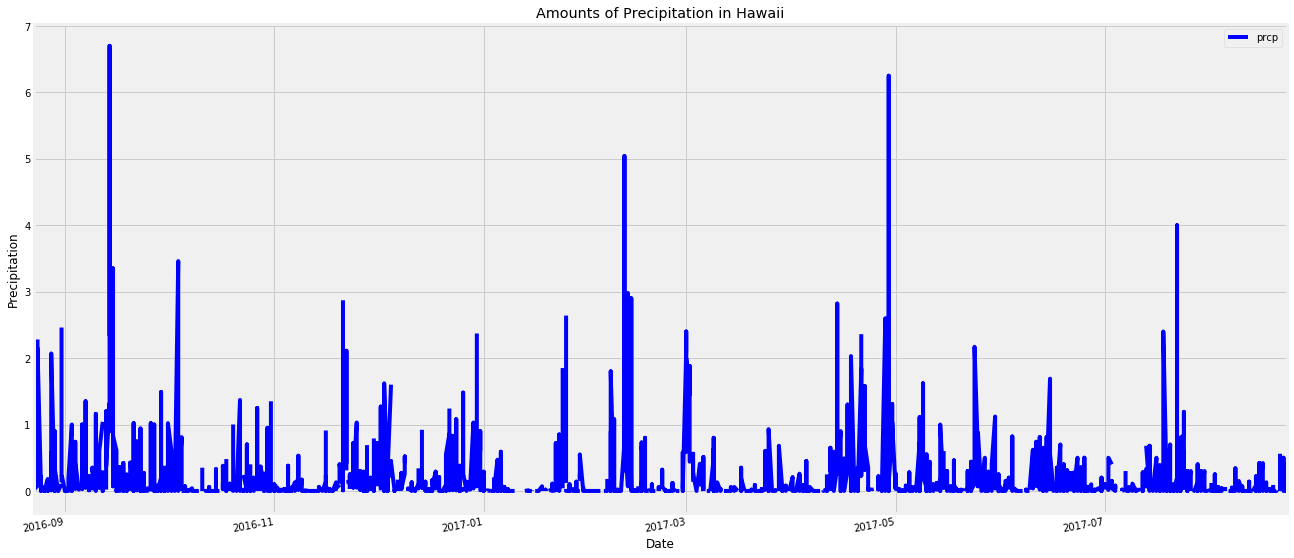

In [42]:
plec_plot = precip_analysis.plot(figsize = (20,10), sort_columns=True, rot=10, use_index=True, legend=True, 
grid=True, color='b')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Amounts of Precipitation in Hawaii')
plt.show()

In [43]:
#Design a query to calculate the total number of stations
num_stat = session.query(Station.station).count()
num_stat

9

In [14]:
# Design a query to find the most active stations
session.query(Station.station, Station.name, func.count(Measurement.tobs)).\
    filter(Station.station==Measurement.station).\
    group_by(Station.name).\
    order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [15]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs) and plot on a histogram
session.query(Station.station, Station.name, func.max(Measurement.tobs)).\
    filter(Station.station==Measurement.station).\
    filter(Measurement.date >= dt.date(2016,8,23)).\
    group_by(Station.name).\
    order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 87.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', 83.0),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 82.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 82.0),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 85.0),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 83.0),
 ('USC00517948', 'PEARL CITY, HI US', 87.0)]

In [16]:
waikiki = session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519397').\
    filter(Measurement.date >= dt.date(2016,8,23)).all()

In [178]:
temps = [temp[0] for temp in waikiki]

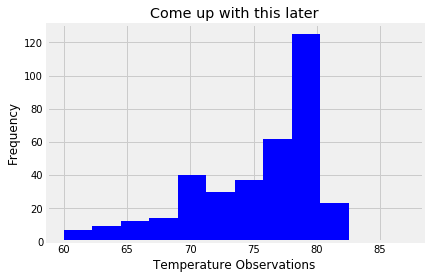

In [185]:
plt.hist(temps, bins=12, color='b')
plt.xlabel('Temperature Observations')
plt.ylabel('Frequency')
plt.title('Come up with this later')
plt.show()

In [96]:
def calc_temps(start_date, end_date):
    query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).all()

    average = query[0][2]
    err = query[0][1]-query[0][0]
    
    plt.figure(figsize=(2,6))
    plt.bar(1, average, yerr=err, tick_label='', color='salmon', alpha=0.8)
#     plt.ylabel('Temperature',weight='bold')
    plt.title('Trip Avg Temperature')
    plt.show()

    return query


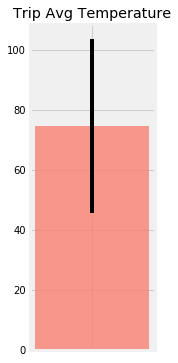

[(58.0, 87.0, 74.59058295964125)]


In [97]:
print(calc_temps('2016-08-23','2017-08-23'))